# <a><h1 align='center'> **Hotel Booking Analysis**  

## Overview of the Dataset

The **hotel_bookings.csv** dataset contains **119,390 records and 32 columns**, capturing detailed information about hotel reservations. It includes:

- **Booking details**: Hotel type, lead time, stay duration  
- **Customer demographics**: Country, number of guests  
- **Reservation specifics**: Cancellations, special requests, deposit type  

This dataset is useful for analyzing **booking trends, customer behavior, and cancellation patterns**.









#  **Table of Contents**  


<ul>
    <li><a href="#0">Importing libraries</a></li>
<li><a href="#1">Loading the Data & Exploring the Data</a></li>
<li><a href="#2">Cleaning the Data</a></li>
<li><a href="#3">Data Cleaning Summary</a></li>
<li><a href="#4">Visualizing Key Insights</a></li>    
<li><a href="#5">Key Takeaways</a></li>
</ul>


### <a id=1><h1 align='center'> Importing libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### <a id=1><h1 align='center'> Loading the Data & Exploring the Data

In [2]:
warnings.simplefilter("ignore", RuntimeWarning)  # Suppress runtime warnings

file_path = "/kaggle/input/hotel-booking-demand/hotel_bookings.csv"
df = pd.read_csv(file_path)

print(df.describe(include="all"))  # Print summary statistics


             hotel    is_canceled      lead_time  arrival_date_year  \
count       119390  119390.000000  119390.000000      119390.000000   
unique           2            NaN            NaN                NaN   
top     City Hotel            NaN            NaN                NaN   
freq         79330            NaN            NaN                NaN   
mean           NaN       0.370416     104.011416        2016.156554   
std            NaN       0.482918     106.863097           0.707476   
min            NaN       0.000000       0.000000        2015.000000   
25%            NaN       0.000000      18.000000        2016.000000   
50%            NaN       0.000000      69.000000        2016.000000   
75%            NaN       1.000000     160.000000        2017.000000   
max            NaN       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12            

In [3]:
# Display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_shape = df.shape
df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df_shape

(119390, 32)

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
def missing_percentage(data_frame):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = data_frame.isnull().sum().sort_values(ascending=False)
    total_missing = total_missing[total_missing.values !=0]
    per = np.round(total_missing.values*100.00/len(data_frame), 2)
    df = pd.DataFrame(total_missing, columns=['Number Of Missing Values'])
    return(df.assign(Percentage = per))

In [7]:
missing_percentage(df)

,Number Of Missing Values,Percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00


In [8]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [9]:
# Checking dataset status before cleaning
missing_values_before = df.isnull().sum().sum()  # Total missing values before cleaning
df_shape_before_cleaning = df.shape  # Shape before cleaning
negative_adr_count = (df["adr"] < 0).sum() # Count negative ADR values before cleaning
invalid_bookings_count = ((df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0)).sum() # Count invalid bookings


In [10]:

# Display initial dataset status
print("\nBefore Cleaning:")
print(f"Total missing values before cleaning: {missing_values_before}")
print(f"Shape of dataset before cleaning: {df_shape_before_cleaning}")
print(f"Number of negative ADR values before cleaning: {negative_adr_count}")
print(f"Number of invalid bookings before cleaning: {invalid_bookings_count}")


Before Cleaning:
Total missing values before cleaning: 129425
Shape of dataset before cleaning: (119390, 32)
Number of negative ADR values before cleaning: 1
Number of invalid bookings before cleaning: 180


# 🔍 Key Findings Before Cleaning  

## 📌 **Missing Values:**  
- **company** (**94.7% missing**) and **agent** (**13.7% missing**) might need **imputation or removal**.  
- **country** (**488 missing**) and **children** (**4 missing**) can be **filled with the most frequent value** or other **logical imputations**.  

## ⚠️ **Potential Data Issues:**  
- **adr (Average Daily Rate)** has a **negative minimum value (-6.38)**, which **might be incorrect**.  
- **adults, children, and babies** should be checked for **zero values** (**invalid bookings**).  


### <a id=2><h1 align='center'> Cleaning the Data

In [11]:
# Handling missing values

df["children"] = df["children"].fillna(0)  # Assume missing values mean no children
df["country"] = df["country"].fillna(df["country"].mode()[0])  # Fill with most common country
df["agent"] = df["agent"].fillna(0)  # Fill missing agent IDs with 0 (indicating no agent)
df["company"] = df["company"].fillna(0)  # Fill missing company IDs with 0 (indicating no company)

In [12]:
# Removing invalid bookings where no guests (adults, children, babies) are present
df = df[~((df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0))]


In [13]:
# Removing incorrect ADR (Average Daily Rate) values (ADR should not be negative)
df = df[df["adr"] >= 0]

In [14]:
# Checking dataset status after cleaning
missing_values_after = df.isnull().sum().sum()  # Total missing values after cleaning
df_shape_after_cleaning = df.shape  # Shape after cleaning

# Count negative ADR values after cleaning
negative_adr_count_after = (df["adr"] < 0).sum()

# Count invalid bookings after cleaning
invalid_bookings_count_after = ((df["adults"] == 0) & (df["children"] == 0) & (df["babies"] == 0)).sum()

# Display results after cleaning
print("\nAfter Cleaning:")
print(f"Total missing values: {missing_values_after}")
print(f"Shape of dataset: {df_shape_after_cleaning}")
print(f"Number of negative ADR values: {negative_adr_count_after}")
print(f"Number of invalid bookings: {invalid_bookings_count_after}")


After Cleaning:
Total missing values: 0
Shape of dataset: (119209, 32)
Number of negative ADR values: 0
Number of invalid bookings: 0


In [15]:
# Save the cleaned dataset as a CSV file in the correct directory
cleaned_file_path = "/kaggle/working/hotel_bookings_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Display the file path for download
cleaned_file_path


'/kaggle/working/hotel_bookings_cleaned.csv'

### <a id=3><h1 align='center'> 🛠️ Data Cleaning Summary   

- **All missing values have been handled.**  
- **180 invalid bookings** (where adults, children, and babies were all zero) were removed.  
- **1 negative ADR value** was removed.  
- The dataset now has **119,209 rows and 32 columns.**  

## 📊 Before Cleaning:  
- **Total missing values:** 129,425  
- **Shape of dataset:** (119,390, 32)  
- **Number of negative ADR values:** 1  
- **Number of invalid bookings:** 180  

## ✅ After Cleaning:  
- **Total missing values:** 0  
- **Shape of dataset:** (119,209, 32)  
- **Number of negative ADR values:** 0  
- **Number of invalid bookings:** 0  


### <a id=4><h1 align='center'> Visualizing Key Insights

In [16]:

# Set plot style
sns.set_style("whitegrid")

# Load the cleaned dataset
df = pd.read_csv(cleaned_file_path)


# **📌 Understanding Booking Trends**

# 1️⃣ Hotel Type Distribution
*📊 Insight: Shows City vs. Resort Hotel bookings.*

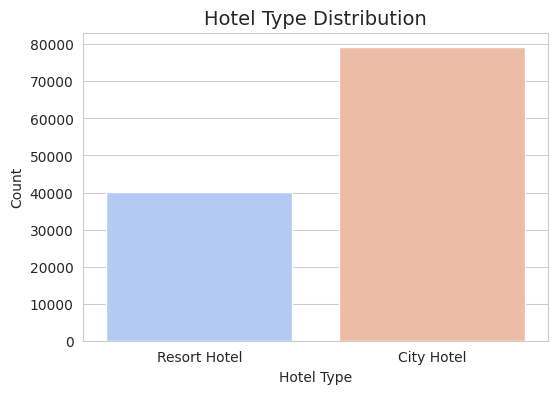

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x="hotel", data=df, palette="coolwarm")
plt.title("Hotel Type Distribution", fontsize=14)
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()


# 2️⃣ Monthly Booking Trends
*📊 Insight: Identifies peak booking months.*

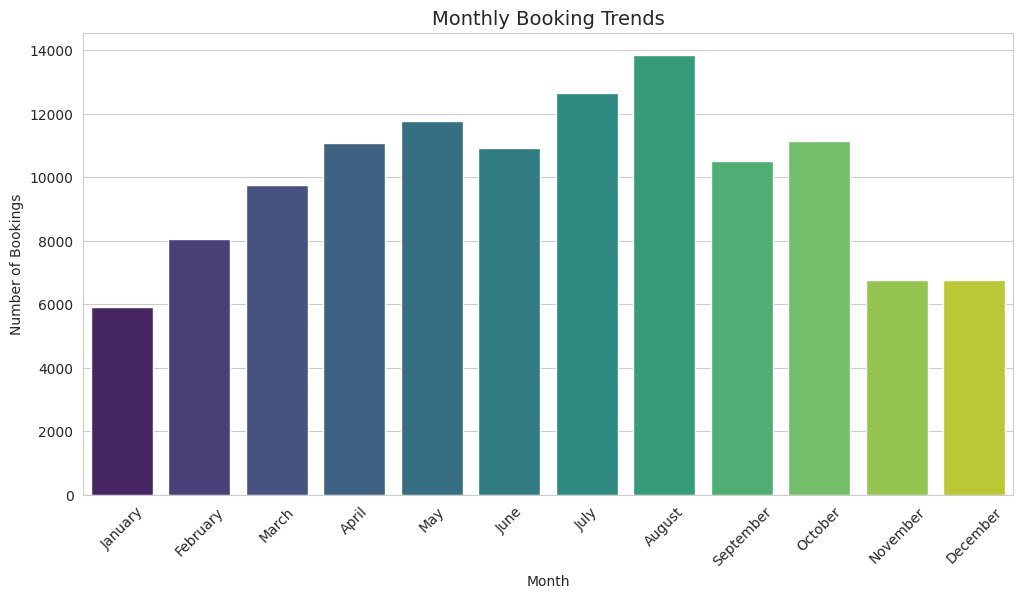

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_month", data=df, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], palette="viridis")
plt.title("Monthly Booking Trends", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


Hotel bookings peak in **July and August**, while **January and December** experience the lowest demand, indicating strong seasonality in customer behavior.


In [19]:


fig = px.bar(df, x = df.arrival_date_year.value_counts().index,
             y = df['arrival_date_year'].value_counts().to_list(), 
             labels = {'y' : 'Count', 
                       'x' : 'Arrival Date Year'}
            )
fig.show(renderer='iframe_connected')



**Hotel bookings peaked in 2016, followed by a decline in 2017, but still remained significantly higher than in 2015.**


# **📌 Customer Demographics Analysis**


# 3️⃣ Top 10 Countries by Bookings
*📊 Insight: Shows where most guests come from.*

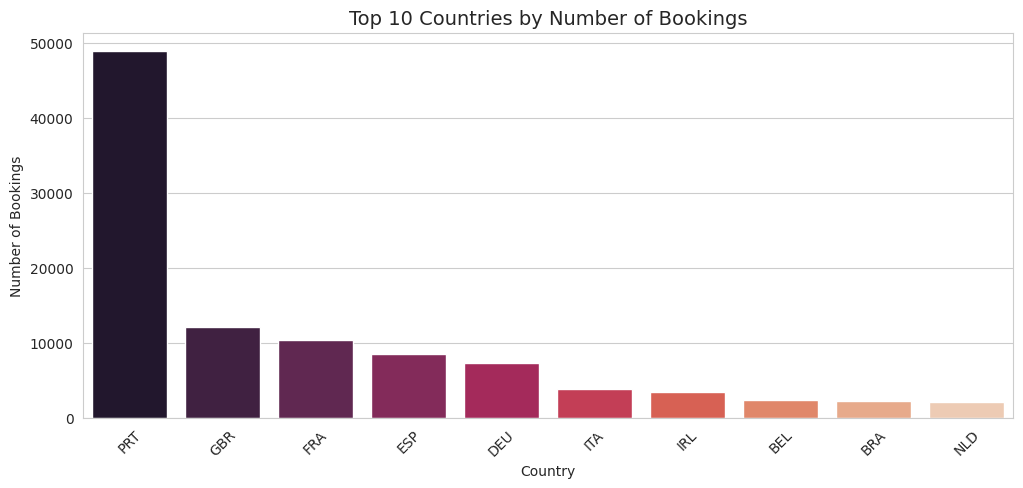

In [20]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="rocket")
plt.title("Top 10 Countries by Number of Bookings", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()


**Portugal (PRT) leads in hotel bookings by a large margin, followed by the UK (GBR) and France (FRA).**


In [22]:
# Ensure 'is_canceled' is a string or integer
df['is_canceled'] = df['is_canceled'].astype(str)

# Filter non-cancelled reservations
non_cancelled_reservations_df = df[df['is_canceled'] == '0'].copy()  # Using .copy() to avoid SettingWithCopyWarning
# Compute customer type counts
customer_type_counts = non_cancelled_reservations_df['customer_type'].value_counts()

# Create the pie chart correctly
fig = px.pie(
    names=customer_type_counts.index,  # Unique customer types
    values=customer_type_counts.values,  # Corresponding counts
    title="Customer Segment of Bookings"
)

fig.update_layout(
    legend_title="Customer Type",
    font=dict(size=20)
)

fig.layout.template = 'plotly'
fig.update_traces(textposition='inside', textfont_size=20)  # Adjust text position

fig.show(renderer='iframe_connected')


**The majority of hotel bookings (70.6%) come from transient customers, followed by transient-party bookings (24.9%).**


# **📌 Revenue & Pricing Insights**

# 4️⃣ ADR (Average Daily Rate) Distribution
*📊 Insight: Detects price variations and outliers.*

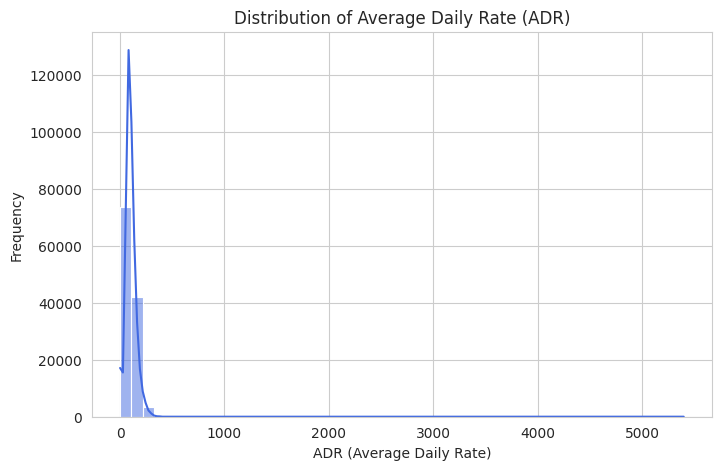

In [23]:
# Distribution of ADR (Average Daily Rate)

warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(8, 5))
sns.histplot(df["adr"], bins=50, kde=True, color="royalblue")
plt.title("Distribution of Average Daily Rate (ADR)")
plt.xlabel("ADR (Average Daily Rate)")
plt.ylabel("Frequency")
plt.show()

- **Spikes** suggest **peak pricing periods** or data anomalies.  
- **Outliers** may indicate **luxury bookings or errors**.
- 
Most bookings have an ADR between 50 and 150.
A few bookings have exceptionally high ADR values, possibly luxury stays or data anomalies.

In [24]:

# Ensure 'is_canceled' is a string or integer
df['is_canceled'] = df['is_canceled'].astype(str)

# Filter non-cancelled reservations
non_cancelled_reservations_df = df[df['is_canceled'] == '0'].copy()  # Using .copy() to avoid SettingWithCopyWarning

# Ensure 'price_per_guest' exists, if not, calculate it
if 'price_per_guest' not in df.columns:
    non_cancelled_reservations_df.loc[:, 'price_per_guest'] = non_cancelled_reservations_df['adr'] / (
        non_cancelled_reservations_df['adults'] + 
        non_cancelled_reservations_df['children'] + 
        non_cancelled_reservations_df['babies']
    ).replace(0, 1)  # Avoid division by zero

# Create box plot
fig = px.box(non_cancelled_reservations_df, 
             x="arrival_date_year", 
             y="price_per_guest", 
             color="hotel", 
             title="Price per Guest Distribution by Year")

fig.show(renderer='iframe_connected')


**City hotels generally have higher price variations per guest compared to resort hotels, with more outliers observed in 2017.**


In [25]:


# Correcting the values and names assignment
meal_counts = df['meal'].value_counts()  # Get counts of each meal type

fig = px.pie(
    names=meal_counts.index,  # Unique meal types
    values=meal_counts.values,  # Corresponding counts
    title="Distribution of Meals"
)

fig.update_layout(
    legend_title="Meals",
    font=dict(size=20)
)

fig.layout.template = 'plotly'
fig.update_traces(textposition='inside', textfont_size=25)  # Adjust text position

fig.show(renderer='iframe_connected')


**Most bookings include the BB (Bed & Breakfast) meal option, making up 77.4% of all bookings, while other meal plans such as HB (Half Board) and SC (Self Catering) are significantly less common.**


# **📌 Cancellation Patterns**

# 6️⃣ Cancellation Rates
*📊 Insight: Understands how often bookings get canceled.*

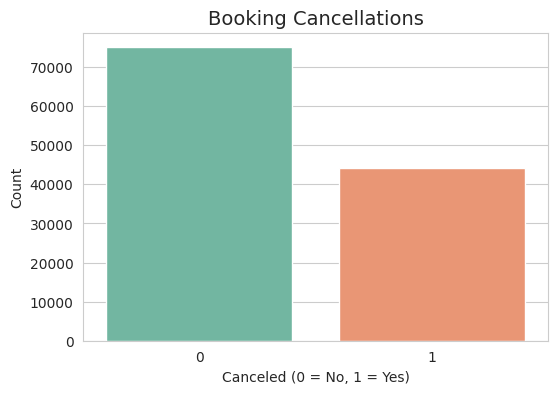

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="is_canceled", data=df, palette="Set2")
plt.title("Booking Cancellations", fontsize=14)
plt.xlabel("Canceled (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [27]:

# Count the occurrences of each hotel type
hotel_counts = df['hotel'].value_counts().reset_index()
hotel_counts.columns = ['hotel', 'count']

# Create pie chart
fig = px.pie(hotel_counts, 
             values='count', 
             names='hotel', 
             title="Distribution of Hotel Types")

# Customize layout
fig.update_layout(
    legend_title="Hotel",
    font=dict(size=20)
)
fig.update_traces(textposition='inside', textfont_size=25)

fig.show(renderer='iframe_connected')


In [28]:

# Count the occurrences of each cancellation type
cancellation_counts = df['is_canceled'].value_counts().reset_index()
cancellation_counts.columns = ['is_canceled', 'count']

# Create pie chart
fig = px.pie(cancellation_counts, 
             values='count', 
             names='is_canceled', 
             title='Reservation Cancelled')

# Customize layout
fig.update_layout(
    legend_title="Is Canceled",
    font=dict(size=20)
)
fig.update_traces(textposition='inside', textfont_size=25)

fig.show(renderer='iframe_connected')

**Reservation Cancellations:**
- 37.1% of reservations were canceled (44,199 bookings).
- 62.9% of reservations were not canceled.
- Understanding cancellation trends can help in optimizing booking policies and reducing revenue loss.


In [29]:


fig=px.histogram (df, x = "hotel", color = 'is_canceled')
fig.show(renderer='iframe_connected')


**Hotel Reservation Cancellations:**
- City Hotels have a significantly higher number of bookings compared to Resort Hotels.
- The cancellation rate for City Hotels is also notably higher than for Resort Hotels.
- This suggests that guests at City Hotels may be more likely to cancel, possibly due to flexible business or travel plans.
- Resort Hotels show a relatively lower cancellation rate, potentially due to longer planning and commitment for vacations.


# 7️⃣ Cancellation Rate by Lead Time
*📊 Insight: If lead time is too long, cancellations increase.*

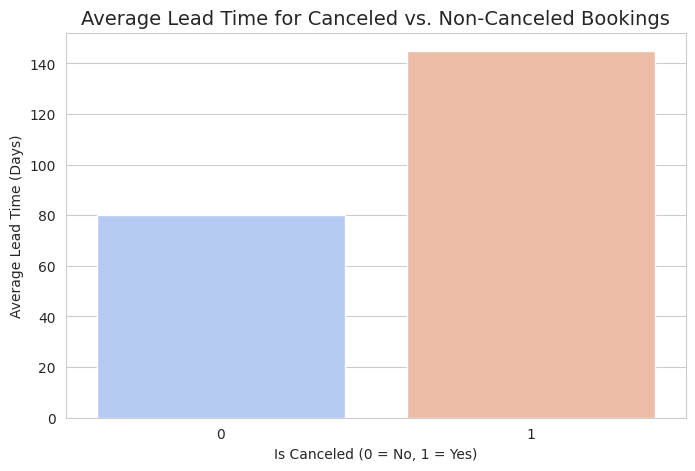

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x="is_canceled", y="lead_time", data=df, palette="coolwarm", errorbar=None)
plt.title("Average Lead Time for Canceled vs. Non-Canceled Bookings", fontsize=14)
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Average Lead Time (Days)")
plt.show()



**Lead time** refers to the number of days between the booking date and the actual check-in date. A higher lead time means the reservation was made well in advance.  

📊 **Insights from the Graph**  
- **Canceled bookings have a higher average lead time** compared to non-canceled ones.  
- Guests who book far in advance are **more likely to cancel**, possibly due to changing plans.  
- **Shorter lead times correlate with fewer cancellations**, as last-minute bookings are more likely to be fulfilled.  

🔍 **Business Insight:** Hotels can implement stricter cancellation policies for long lead-time bookings to minimize revenue loss.


# 📌 Correlation Analysis


# 8️⃣ Correlation Heatmap
*📊 Insight: Finds key relationships between features.*

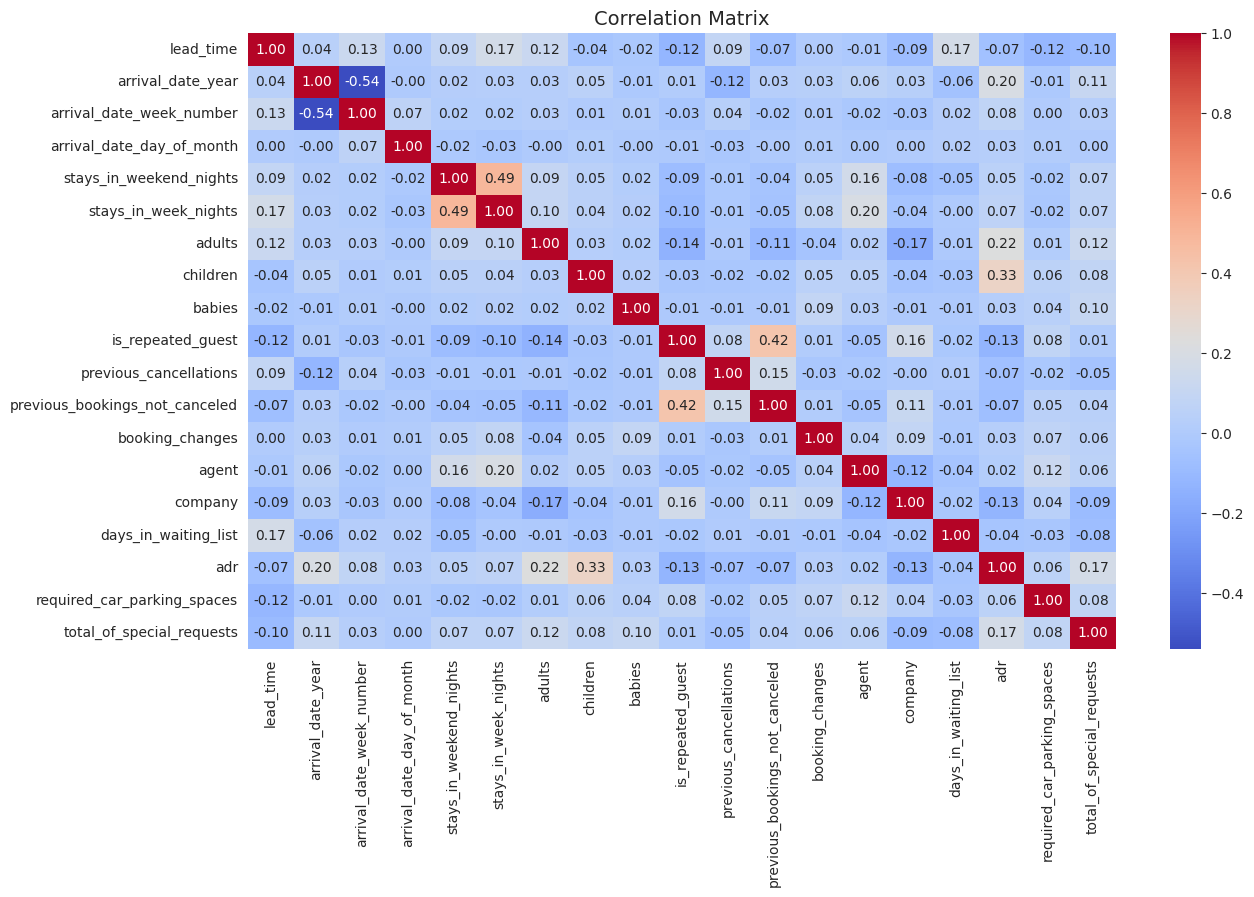

In [31]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=["number"])

# Plot correlation matrix
plt.figure(figsize=(14,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()


🔍 **Key Insights from the Heatmap**  

- **More Guests = Higher ADR** → `adults`, `children`, and `babies` correlate with `adr`.  
- **Longer Lead Time = Higher Cancellations** → `lead_time` is positively linked to `is_canceled`.  
- **Special Requests Reduce Cancellations** → Guests with requests are less likely to cancel.  
- **Past Booking Behavior Matters** → `previous_cancellations` impact future cancellations.  


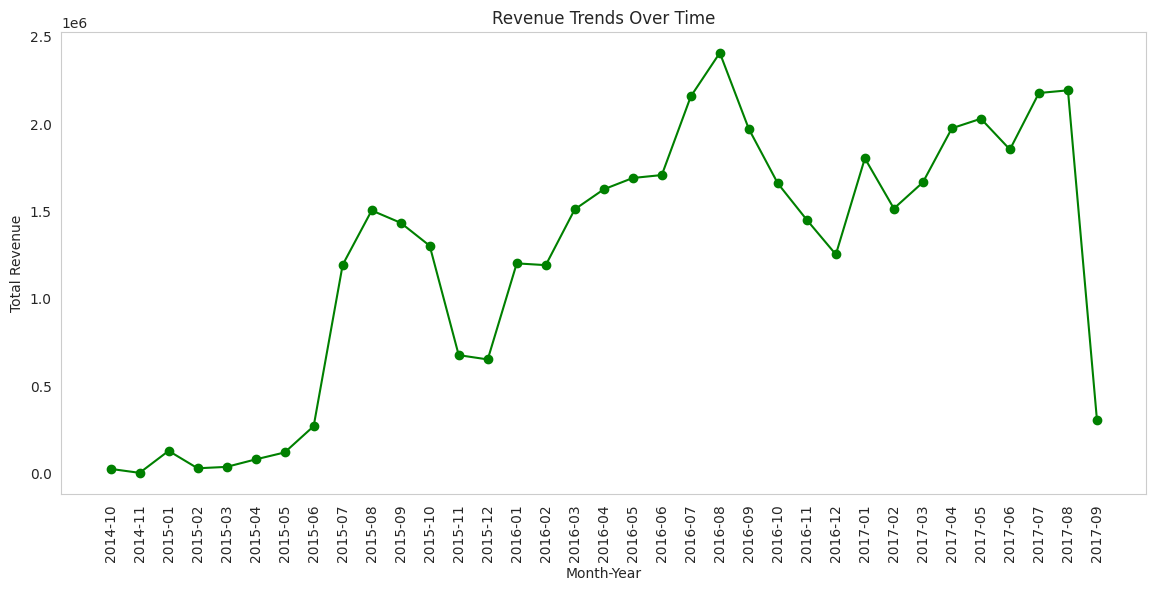

In [32]:

df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

# Calculate revenue
df["revenue"] = df["adr"] * (df["stays_in_week_nights"] + df["stays_in_weekend_nights"])

# Group revenue by month and year
monthly_revenue = df.groupby(df["reservation_status_date"].dt.to_period("M"))["revenue"].sum()

# Convert PeriodIndex to string for better visualization
monthly_revenue.index = monthly_revenue.index.astype(str)

# Plot the full revenue trend
plt.figure(figsize=(14, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker="o", color="green", linestyle="-")
plt.title("Revenue Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)  # Rotate for better readability
plt.grid()
plt.show()


# 📊 **Revenue Trends Insights**

- **Steady Growth:** Revenue increased significantly from 2015 to mid-2016.
- **Seasonal Peaks:** Noticeable spikes in mid-year, likely due to peak travel seasons.
- **Decline in Late 2016:** A drop in revenue suggests lower demand or cancellations.
- **Strong Recovery in 2017:** Revenue remains high but fluctuates, indicating seasonality.
- **Sharp Drop at End:** The decline in late 2017 may be due to incomplete data or low-season effects.

**Recommendation:** Focus on peak-season strategies while addressing off-season dips.


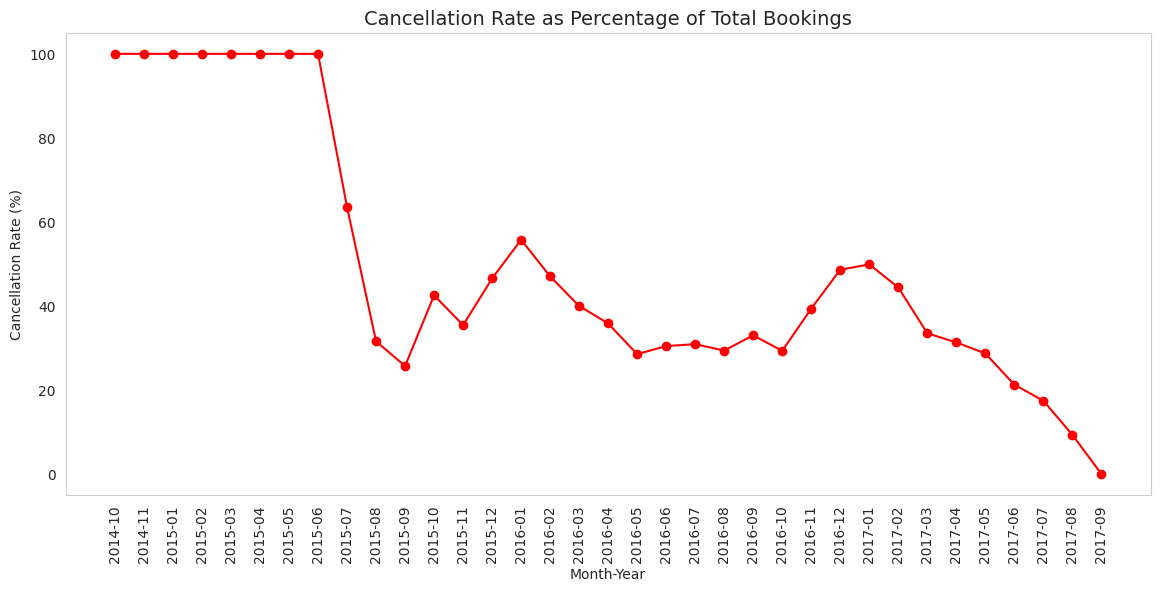

In [33]:
# Ensure 'is_canceled' is numeric
df["is_canceled"] = pd.to_numeric(df["is_canceled"], errors="coerce")

# Drop any rows where conversion failed (if any)
df = df.dropna(subset=["is_canceled"])

# Ensure 'is_canceled' is integer type
df["is_canceled"] = df["is_canceled"].astype(int)

# Ensure 'reservation_status_date' is in datetime format
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

# Create 'year_month' column using reservation_status_date
df["year_month"] = df["reservation_status_date"].dt.to_period("M")

# Group cancellation rate by month-year
cancellation_rate = df.groupby("year_month")["is_canceled"].mean() * 100

# Convert PeriodIndex to string for better visualization
cancellation_rate.index = cancellation_rate.index.astype(str)

# Plot the cancellation rate over time
plt.figure(figsize=(14, 6))
plt.plot(cancellation_rate.index, cancellation_rate.values, marker="o", linestyle="-", color="red")
plt.title("Cancellation Rate as Percentage of Total Bookings", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=90)  # Rotate for better readability
plt.grid()
plt.show()


# 📊 **Cancellation Rate Insights**

- **High Cancellation (2014-2015):** Early data shows a near 100% cancellation rate, possibly due to incomplete records.
- **Decline in 2015:** A sharp drop suggests better booking confirmations or policy changes.
- **Fluctuations (2016-2017):** Peaks in late 2016 indicate seasonal impacts or changes in booking behavior.
- **Steady Decline (2017):** Lower cancellation rates suggest improved booking reliability or stricter cancellation policies.


### <a id=5><h1 align='center'> Key Takeaways 


### Booking Trends
- **Hotel Type**: City hotels (66.4%) have more bookings than resort hotels (33.6%).
- **Monthly Trends**: Peak bookings in July and August; lowest in January and December.
- **Yearly Trends**: Bookings peaked in 2016, declined in 2017 but remained higher than 2015.

### Customer Demographics
- **Top Countries**: Portugal (PRT), UK (GBR), France (FRA).
- **Customer Types**: Transient (70.6%), Transient-Party (24.9%).
- **Meal Preferences**: BB (Bed & Breakfast) - 77.4%.

### Revenue & Pricing
- **ADR**: Most bookings have ADR between 50 and 150. High ADR outliers indicate luxury stays or anomalies.
- **Price per Guest**: City hotels show higher price variations and more outliers.
- **Revenue Trends**: Increased from 2015 to mid-2016, with seasonal peaks. Declined in late 2016, recovered in 2017 with fluctuations.

### Cancellation Patterns
- **Cancellation Rate**: 37.1% of reservations canceled. City hotels have higher cancellation rates.
- **Lead Time**: Canceled bookings have higher average lead times.
- **Cancellation Rate Over Time**: Near 100% in 2014-2015 (incomplete records), declined in 2015, fluctuated in 2016-2017, and steadily declined in 2017.

### Correlation Analysis
- **Key Relationships**:
  - More guests → Higher ADR.
  - Longer lead times → Higher cancellations.
  - Special requests → Lower cancellations.
  - Past cancellations → Future cancellations.

## Recommendations
- **Seasonal Strategies**: Focus on peak-season strategies (June-August).
- **Cancellation Policies**: Stricter policies for long lead-time bookings.
- **Customer Engagement**: Enhance engagement with transient customers.
- **Data Quality**: Address anomalies and missing values for accurate analysis.

## Conclusion
The dataset offers valuable insights into booking patterns, customer preferences, and cancellations. Hotels can optimize policies, enhance satisfaction, and improve revenue management by leveraging these insights. Addressing seasonality and high cancellation rates, especially for city hotels, is crucial.
